# Training an intents classification model

Define constants

In [1]:
from os import getcwd, path
import sys
import matplotlib.pyplot as plt
import numpy as np

BASE_PATH = path.dirname(getcwd())
sys.path.append(BASE_PATH)

DATA_UTILS = path.join(BASE_PATH, 'common/data_utils.py')
TRAIN_PATH = path.join(BASE_PATH, 'kc_data.json')
CLASSES_FILE = path.join(BASE_PATH, 'classes.json')

In [2]:
exec(open(DATA_UTILS).read())

Use functions from the utils to extract and preprocess the training data
Refer to `kc_data.json` for the sample data format
`get_data_pairs` is then used to parse data into a tuple of `([list_of_sentences], [list_of_labels])`

In [3]:
X_data, y_data = get_data_pairs(data_from_json(TRAIN_PATH))

classes = list(set(y_data))
num_classes = len(classes)

X_train = X_data
y_train = np.array([
    classes.index(item)
    for item in y_data
], dtype='int32')

Plot the training data

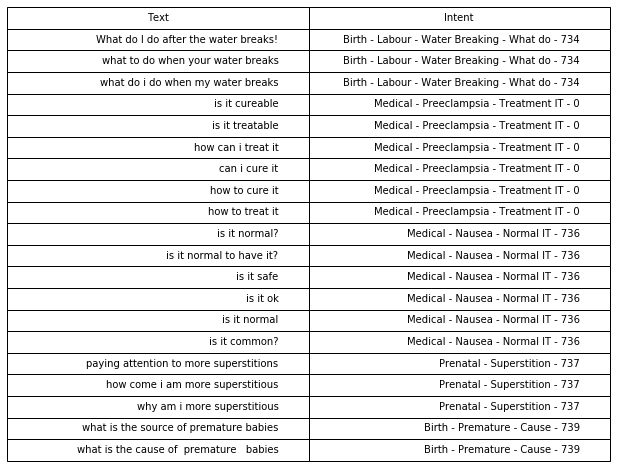

In [4]:
cell_text = [
    [item, y_data[idx] + ' - ' + str(int(y_train[idx]))] 
    for (idx, item) in enumerate(X_train)
]
plt.table(cellText=cell_text[:20],
          colLabels=['Text', 'Intent'],
          loc='center') \
   .scale(1.8,1.8)
plt.axis('off')
plt.show()

In [5]:
print('Number of samples: %s, classes: %s' % (len(X_train), num_classes))

Number of samples: 10256, classes: 1427


Save the classes descriptions as json

In [6]:
import json

with open(CLASSES_FILE, 'w') as classes_file:
    json.dump(classes, classes_file)

In [7]:
import torch
torch.__version__

'0.5.0a0+a24163a'

Start training the classification model and save

In [8]:
import torch.optim as optim
from text_classification.sif_starspace.model import StarspaceClassifierWrapper
from text_classification.sif_starspace.train import StarspaceClassifierLearner
from common.callbacks import PrintLoggerCallback, EarlyStoppingCallback

model = StarspaceClassifierWrapper({'num_classes': num_classes})
# learner = StarspaceClassifierLearner(model, 
#     optimizer_fn=optim.SGD, 
#     optimizer_kwargs={'lr': 0.01, 'momentum': 0.9}
# )
learner = StarspaceClassifierLearner(model)

In [9]:
learner.fit(
    training_data=(X_train, y_train),
    batch_size=64,
    epochs=300,
    callbacks=[
        PrintLoggerCallback(log_every=1),
        EarlyStoppingCallback(tolerance=0)
    ]
)

2m 12s (- 660m 0s) (1 0%) - loss: 901.5608 - accuracy: 0.1120
4m 4s (- 606m 20s) (2 0%) - loss: 711.5388 - accuracy: 0.3590
6m 8s (- 608m 42s) (3 1%) - loss: 624.0045 - accuracy: 0.4528
7m 53s (- 584m 22s) (4 1%) - loss: 568.7495 - accuracy: 0.5011
9m 38s (- 569m 4s) (5 1%) - loss: 525.7917 - accuracy: 0.5348
11m 33s (- 566m 17s) (6 2%) - loss: 489.2413 - accuracy: 0.5517
13m 28s (- 564m 15s) (7 2%) - loss: 456.9342 - accuracy: 0.5705
15m 7s (- 552m 18s) (8 2%) - loss: 426.7921 - accuracy: 0.5839
16m 41s (- 539m 52s) (9 3%) - loss: 398.9547 - accuracy: 0.5960
18m 20s (- 532m 5s) (10 3%) - loss: 373.5286 - accuracy: 0.6063
20m 1s (- 525m 57s) (11 3%) - loss: 348.7316 - accuracy: 0.6192
21m 45s (- 522m 4s) (12 4%) - loss: 325.8453 - accuracy: 0.6278
23m 27s (- 517m 56s) (13 4%) - loss: 304.1560 - accuracy: 0.6384
25m 5s (- 512m 32s) (14 4%) - loss: 284.9552 - accuracy: 0.6512
26m 43s (- 507m 48s) (15 5%) - loss: 266.5203 - accuracy: 0.6569
28m 21s (- 503m 19s) (16 5%) - loss: 248.6947 - 

In [10]:
torch.topk(model(['I\'m having diahrea']), 50)

AttributeError: 'StarspaceClassifierWrapper' object has no attribute 'n_classes'

In [ ]:
torch.topk(model(['the earth is flat']), 50)

In [ ]:
classes[1251]